In [1]:
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
import cv2

In [2]:
b_source = cv2.imread('images/b_high_pass_source.png', cv2.IMREAD_GRAYSCALE)

b_fft = np.fft.fft2(b_source)
b_fft_shift = np.fft.fftshift(b_fft)
b_fft_spectrum = 20*np.log(np.abs(b_fft_shift))

In [5]:
b_mask = cv2.circle(np.ones(b_fft_shift.shape), tuple(i//2 for i in b_fft_shift.shape), 100, 0, thickness=-1)
b_fft_m = np.multiply(b_fft_shift, b_mask)

b_result = np.fft.fft2(b_fft_m)
b_result_spectrum = np.log(np.abs(b_result))

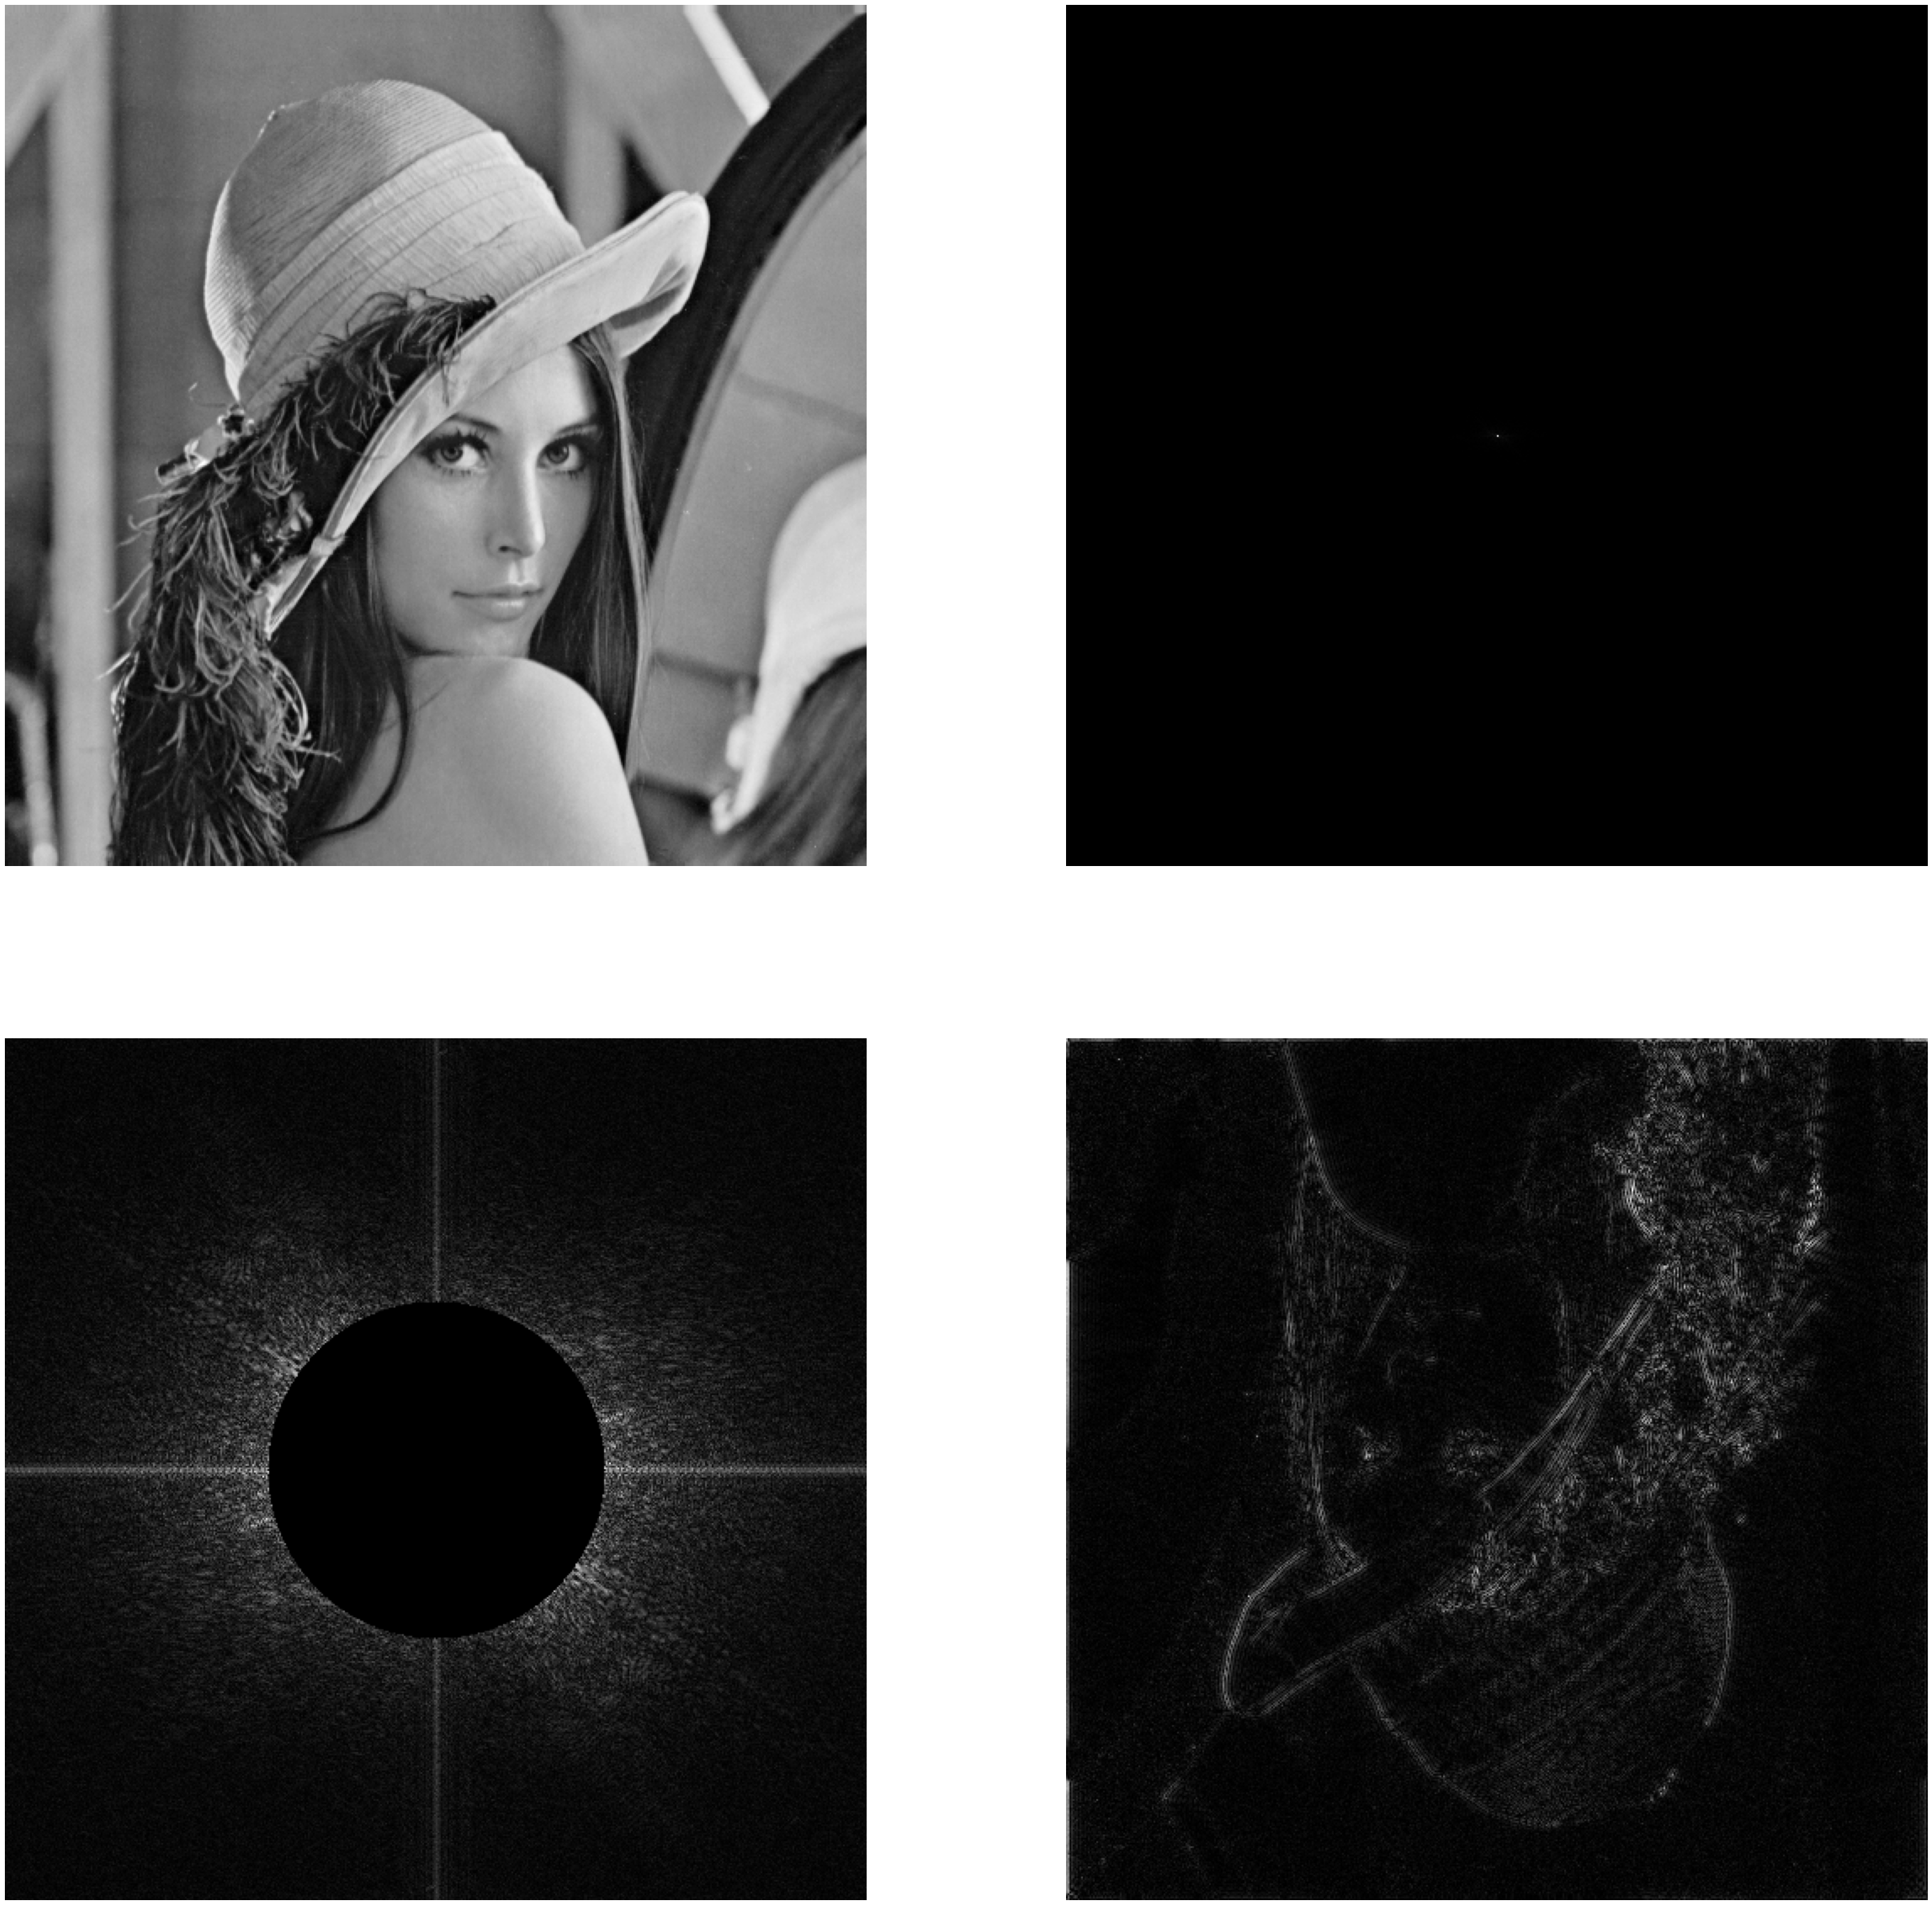

In [7]:
B_PLOTS = [b_source, np.abs(b_fft_shift), np.abs(b_fft_m), np.abs(b_result)]
fig = plt.figure(figsize=(50, 50))

for i, image in enumerate(B_PLOTS):
  fig.add_subplot(2, 2, i+1)
  plt.axis("off")
  plt.imshow(image, cmap="gray")
plt.show()